# <center> House Prices Prediction with SKLearn Pipeline

## Outline
- [ 1 - Packages](#1)
- [ 2 - Data Load](#2)
- [ 3 - EDA](#3)
- [ 4 - Creating SKLearn Pipeline](#4)
    - [ 4.1 - Handling Outliers](#4.1)
    - [ 4.2 - Fixing Skew](#4.2)
    - [ 4.3 - Handling Missing Values](#4.3)
    - [ 4.4 - Numerical Data Pipeline](#4.4)
    - [ 4.5 - Categorical Data Pipeline](#4.5)
    - [ 4.6 - Combining Data Pipelines](#4.6)
    - [ 4.7 - Machine Learning Models](#4.7)
    - [ 4.8 - Adding ML Models to the Pipeline](#4.8)
- [ 5 - Models Cross Validation](#5) 
- [ 6 - Hyperparameter Tuning](#6)
    - [ 6.1 - Coarse Hyperparameter Tuning Using RandomizedSearchCV](#6.1)
    - [ 6.2 - Finer Hyperparameter Tuning Using GridSearchCV](#6.2)
- [ 7 - Making Predictions](#7)


<a name="1"></a>
## 1 - Packages

In [48]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os, pickle
import missingno as msgn

from sklearn.metrics import mean_squared_error

# model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

<a name="2"></a>
## 2 - Data Load

In [49]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print('Shape of the train data with all features:', train.shape)
#train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the test data with all features:', test.shape)
#train.drop('Id',axis = 1, inplace = True)
#train.fillna(0,inplace=True)

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (1460, 81)

Shape of the test data with all features: (1459, 80)

List of features contained our dataset: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', '

<a name="3"></a>
## 3 - EDA

#### Data Description
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

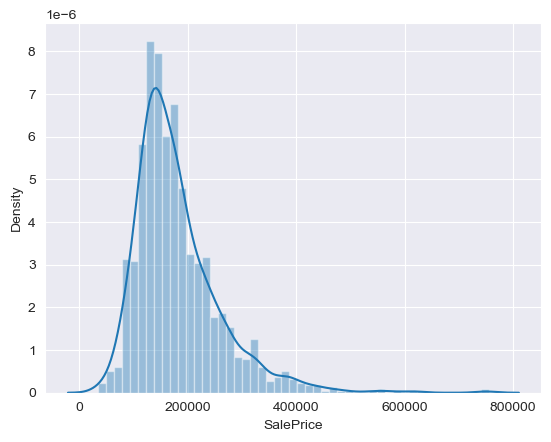

In [51]:
# Distribution of Sale Price
sns.distplot(train["SalePrice"])

In [52]:
# checking if there are any duplicates in train
train.duplicated().sum()

0

In [53]:
# categorical and numerical columns
cate_feat = list(train.select_dtypes(include = [object]).columns)
num_feat = list(train.select_dtypes(exclude = [object]).columns)

print(cate_feat)
print('\n')
print(num_feat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',

In [54]:
# finding if any feature has zero variance (numerical feature)
print("Numerical features having zero variance:\n")
for feature in num_feat:
    if train[feature].var() == 0:
        print(feature)

Numerical features having zero variance:



In [55]:
# finding out if any feature has zero variance (categorical feature)
print("Categorical features having only one unique value:")
for feature in cate_feat:
    if train[feature].nunique() == 1:
        print(feature)

Categorical features having only one unique value:


In [56]:
# we will consider the numerical features having less than 20 unique values as categorical features
for feature in num_feat:
    if train[feature].nunique() <= 20:
        cate_feat.append(feature)
        num_feat.remove(feature)

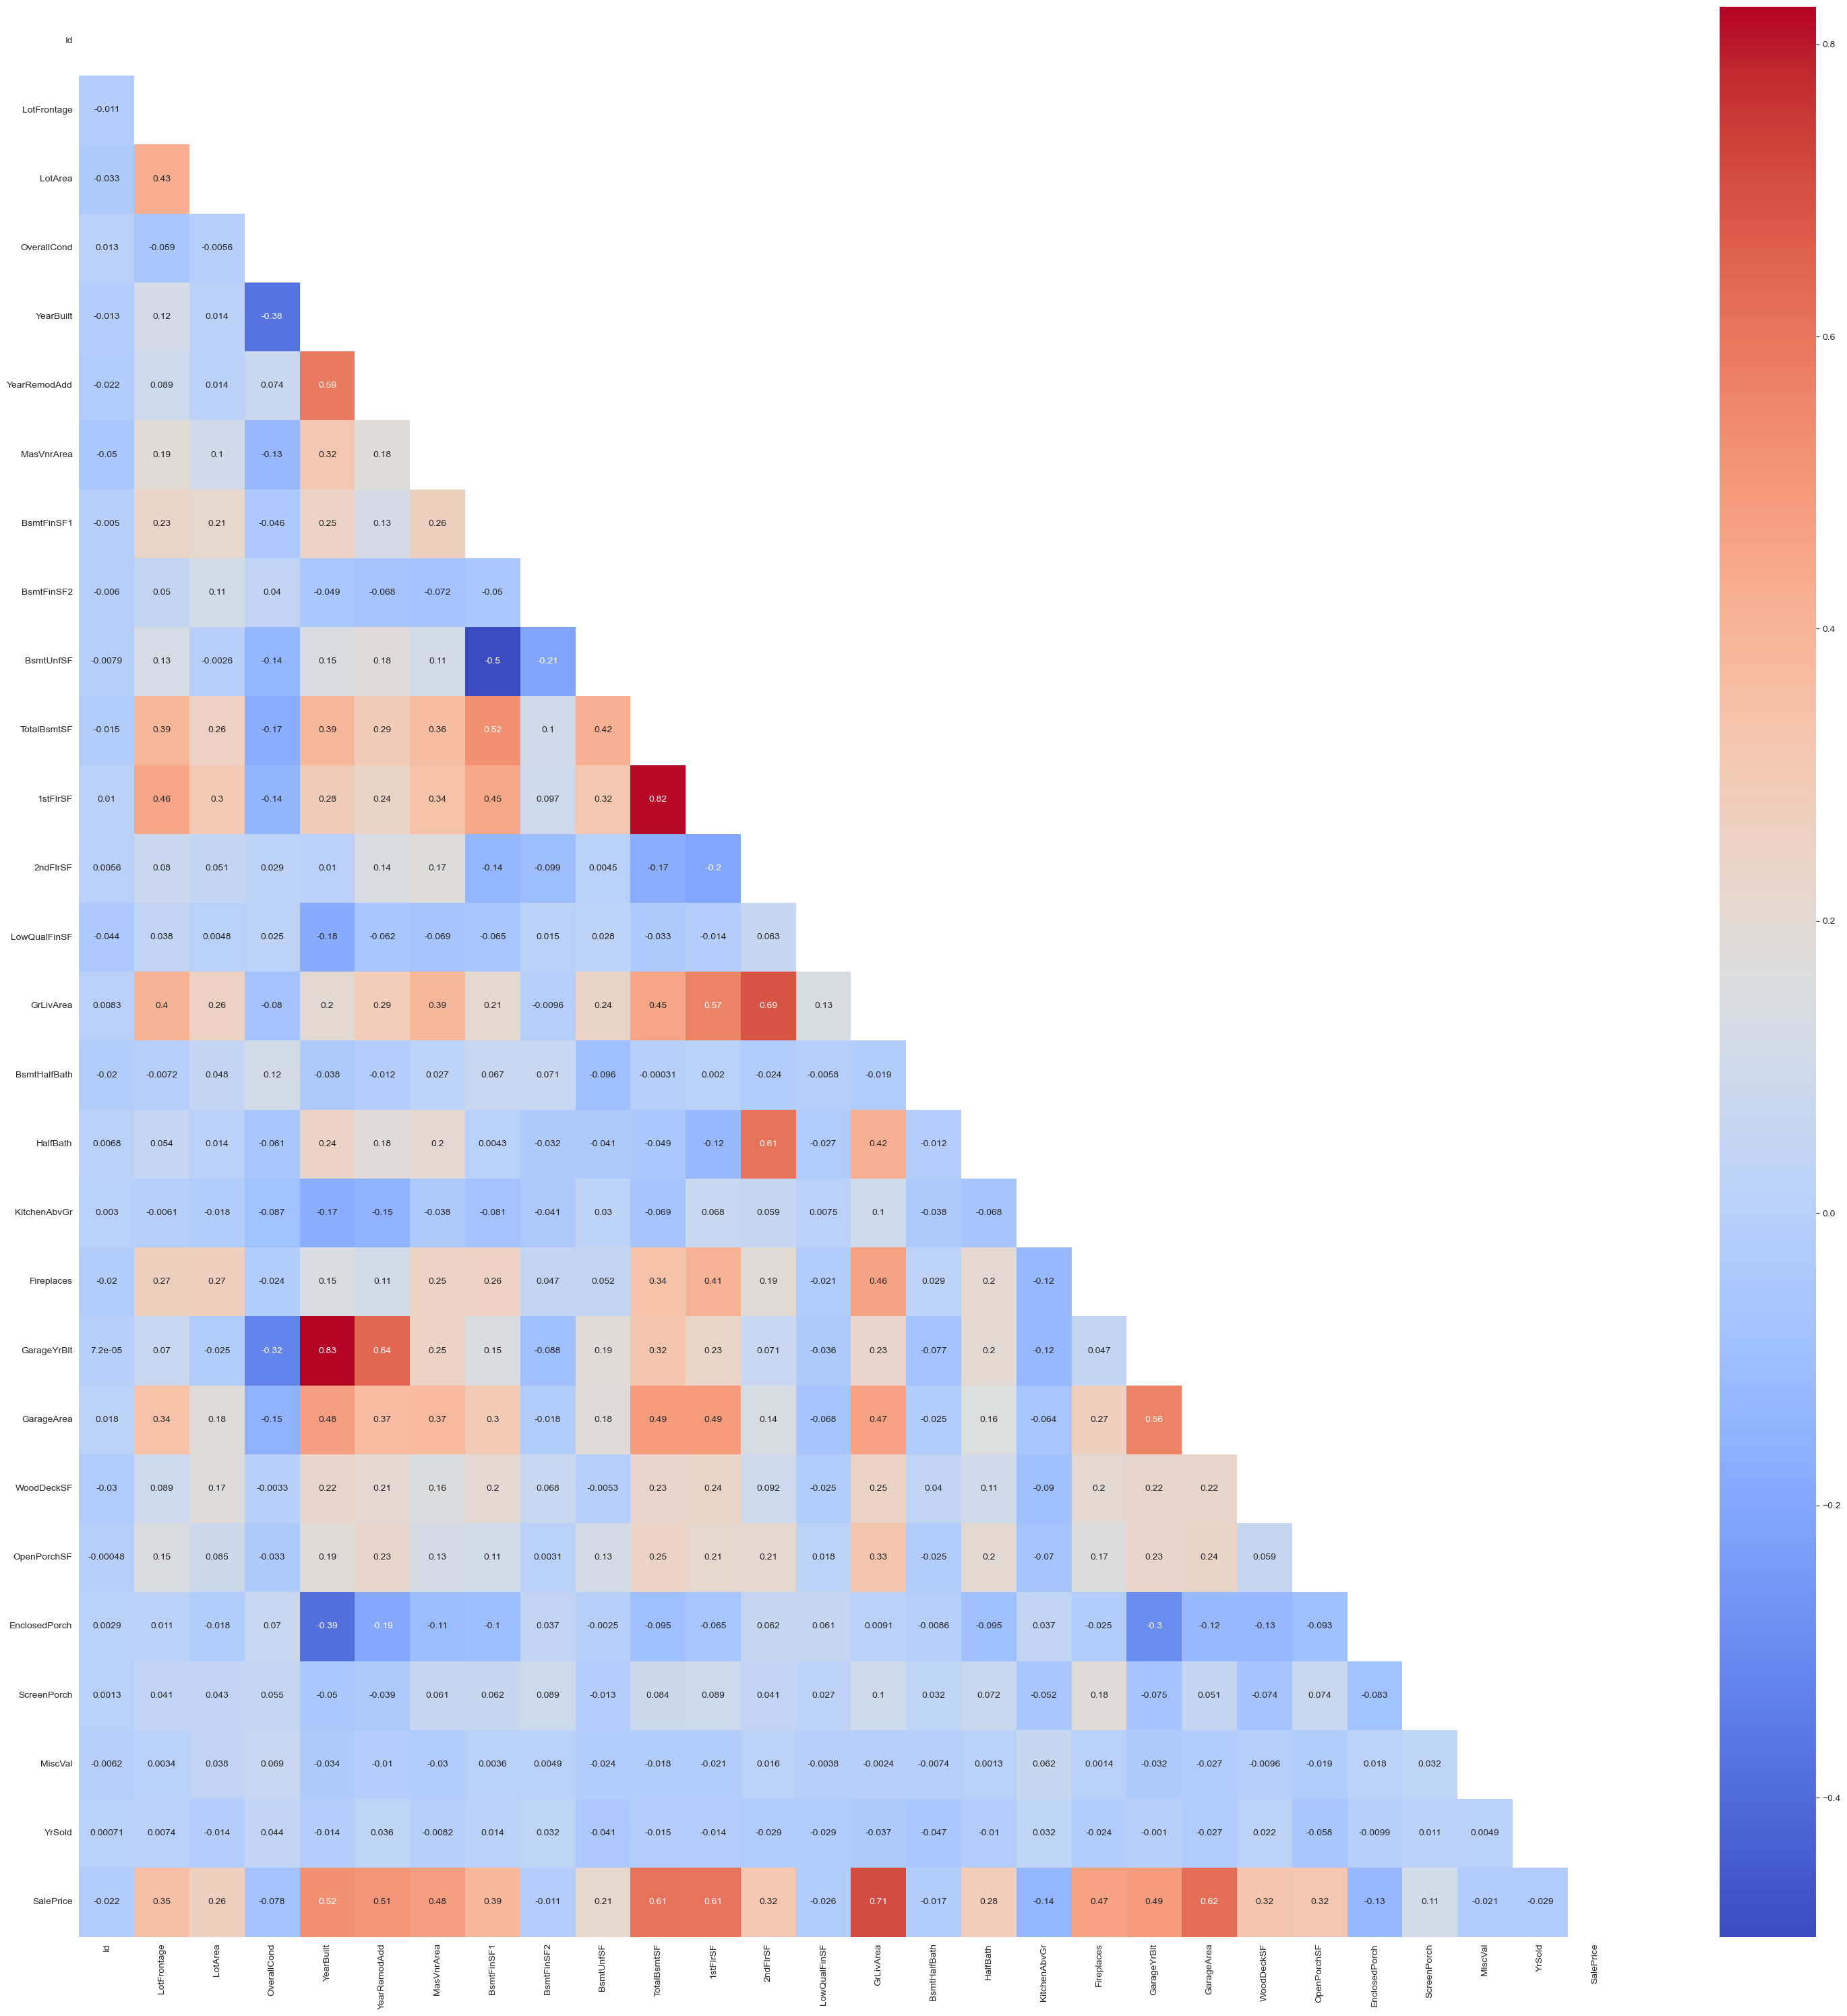

In [57]:
# checking the correlation between the numerical independent features and depedent features
sns.set_style('whitegrid')
plt.figure(figsize=(30,30))
corr = train[num_feat].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

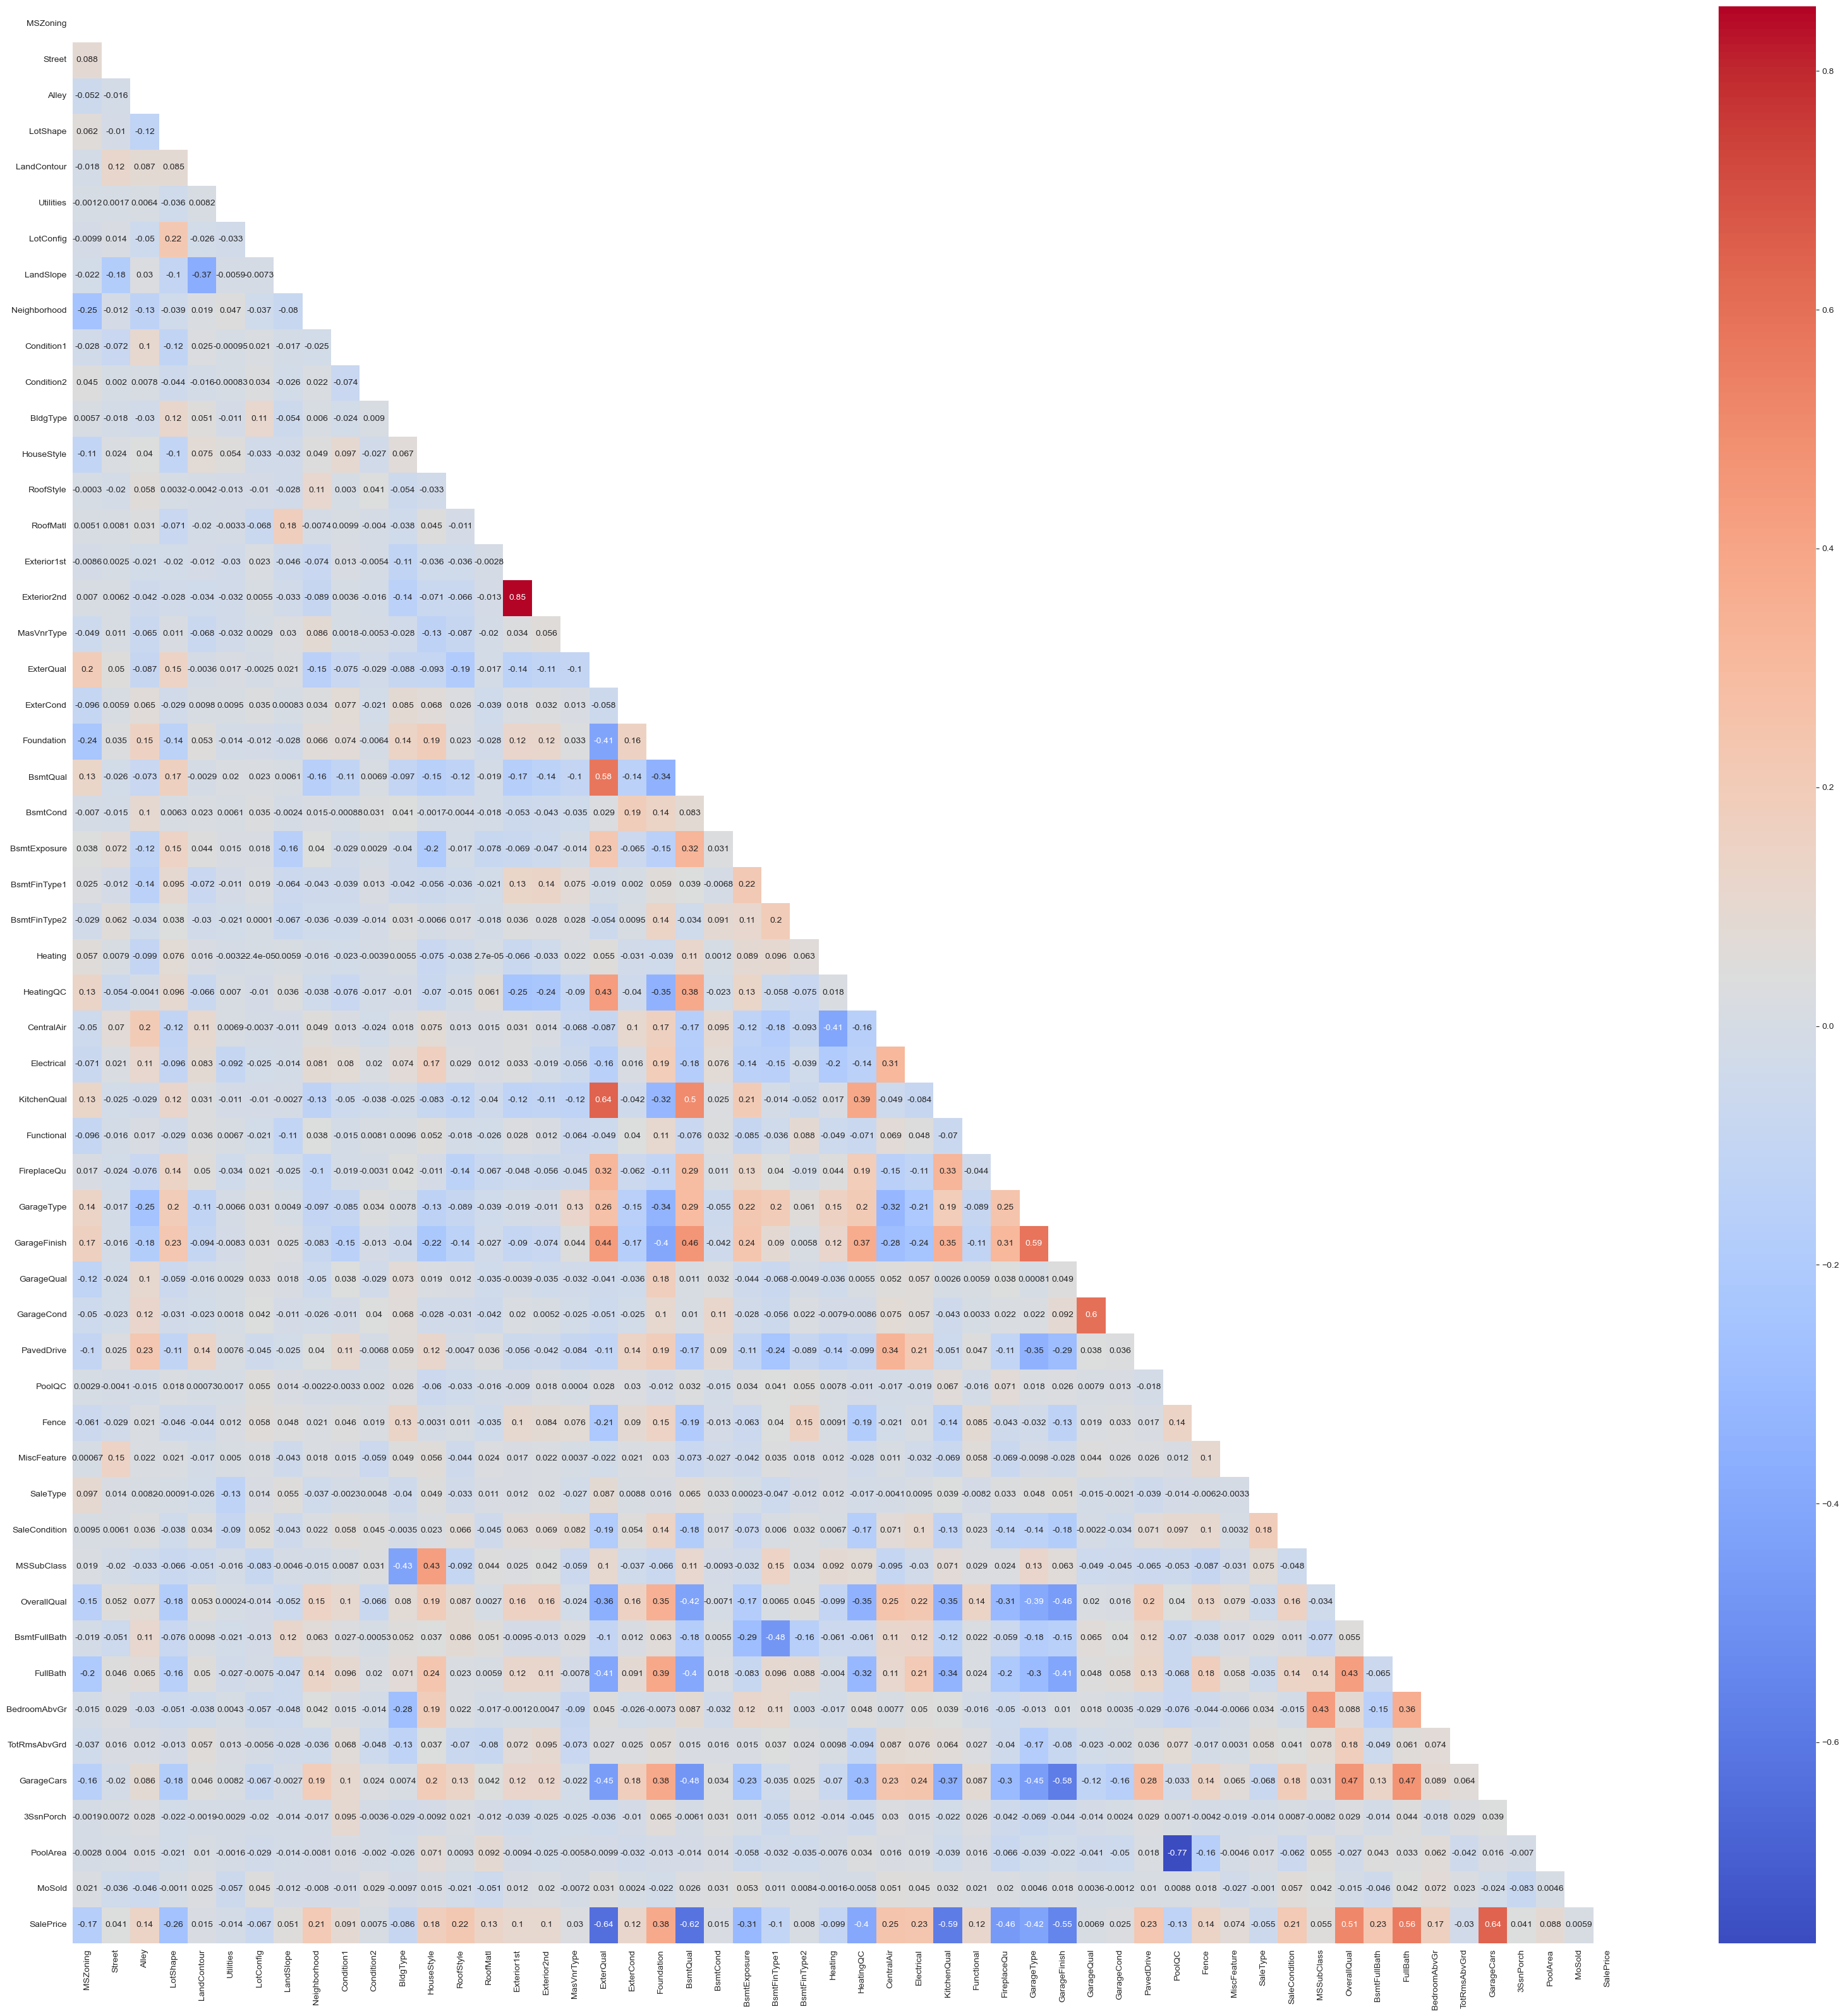

In [58]:
# checking the correlation between the categorical independent features and depedent features
sns.set_style('whitegrid')

df1 = pd.DataFrame(OrdinalEncoder().fit_transform(train[cate_feat].astype(str)), columns=cate_feat) # dataframe having categorical feature
df2 = pd.DataFrame(train['SalePrice'], columns=['SalePrice']) # dataframe having dependent feature
df_cat = pd.concat([df1, df2], axis=1) # dataframe having all the categorical features and one dependent feature

plt.figure(figsize=(32,32))
corr = df_cat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

In [59]:
# finding the numerical features having more than 20% correlation with the dependent feature
notable_num_feat = []

for feature in num_feat:
    if (train[feature].corr(train['SalePrice']) >= 0.20) | (train[feature].corr(train['SalePrice']) <=  -0.20):
        notable_num_feat.append(feature)
        
del notable_num_feat[-1]  # This will remove the dependent feature from notable numberical features
print(f"The numerical features having more than 20% correlation with the dependent feature are:\n {notable_num_feat} (Total of {len(notable_num_feat)})")

The numerical features having more than 20% correlation with the dependent feature are:
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'] (Total of 17)


In [60]:
# finding the categorical features having more than 20% correlation with the dependent feature
notable_cat_feat = []

for feature in cate_feat:
    if (df_cat[feature].corr(df_cat['SalePrice']) >= 0.20) | ( df_cat[feature].corr(df_cat['SalePrice']) <=  -0.20):
        notable_cat_feat.append(feature)

print(f"The categorical features having more than 20% correlation with the dependent feature are:\n {notable_cat_feat} (Total of {len(notable_cat_feat)})")

The categorical features having more than 20% correlation with the dependent feature are:
 ['LotShape', 'Neighborhood', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleCondition', 'OverallQual', 'BsmtFullBath', 'FullBath', 'GarageCars'] (Total of 20)


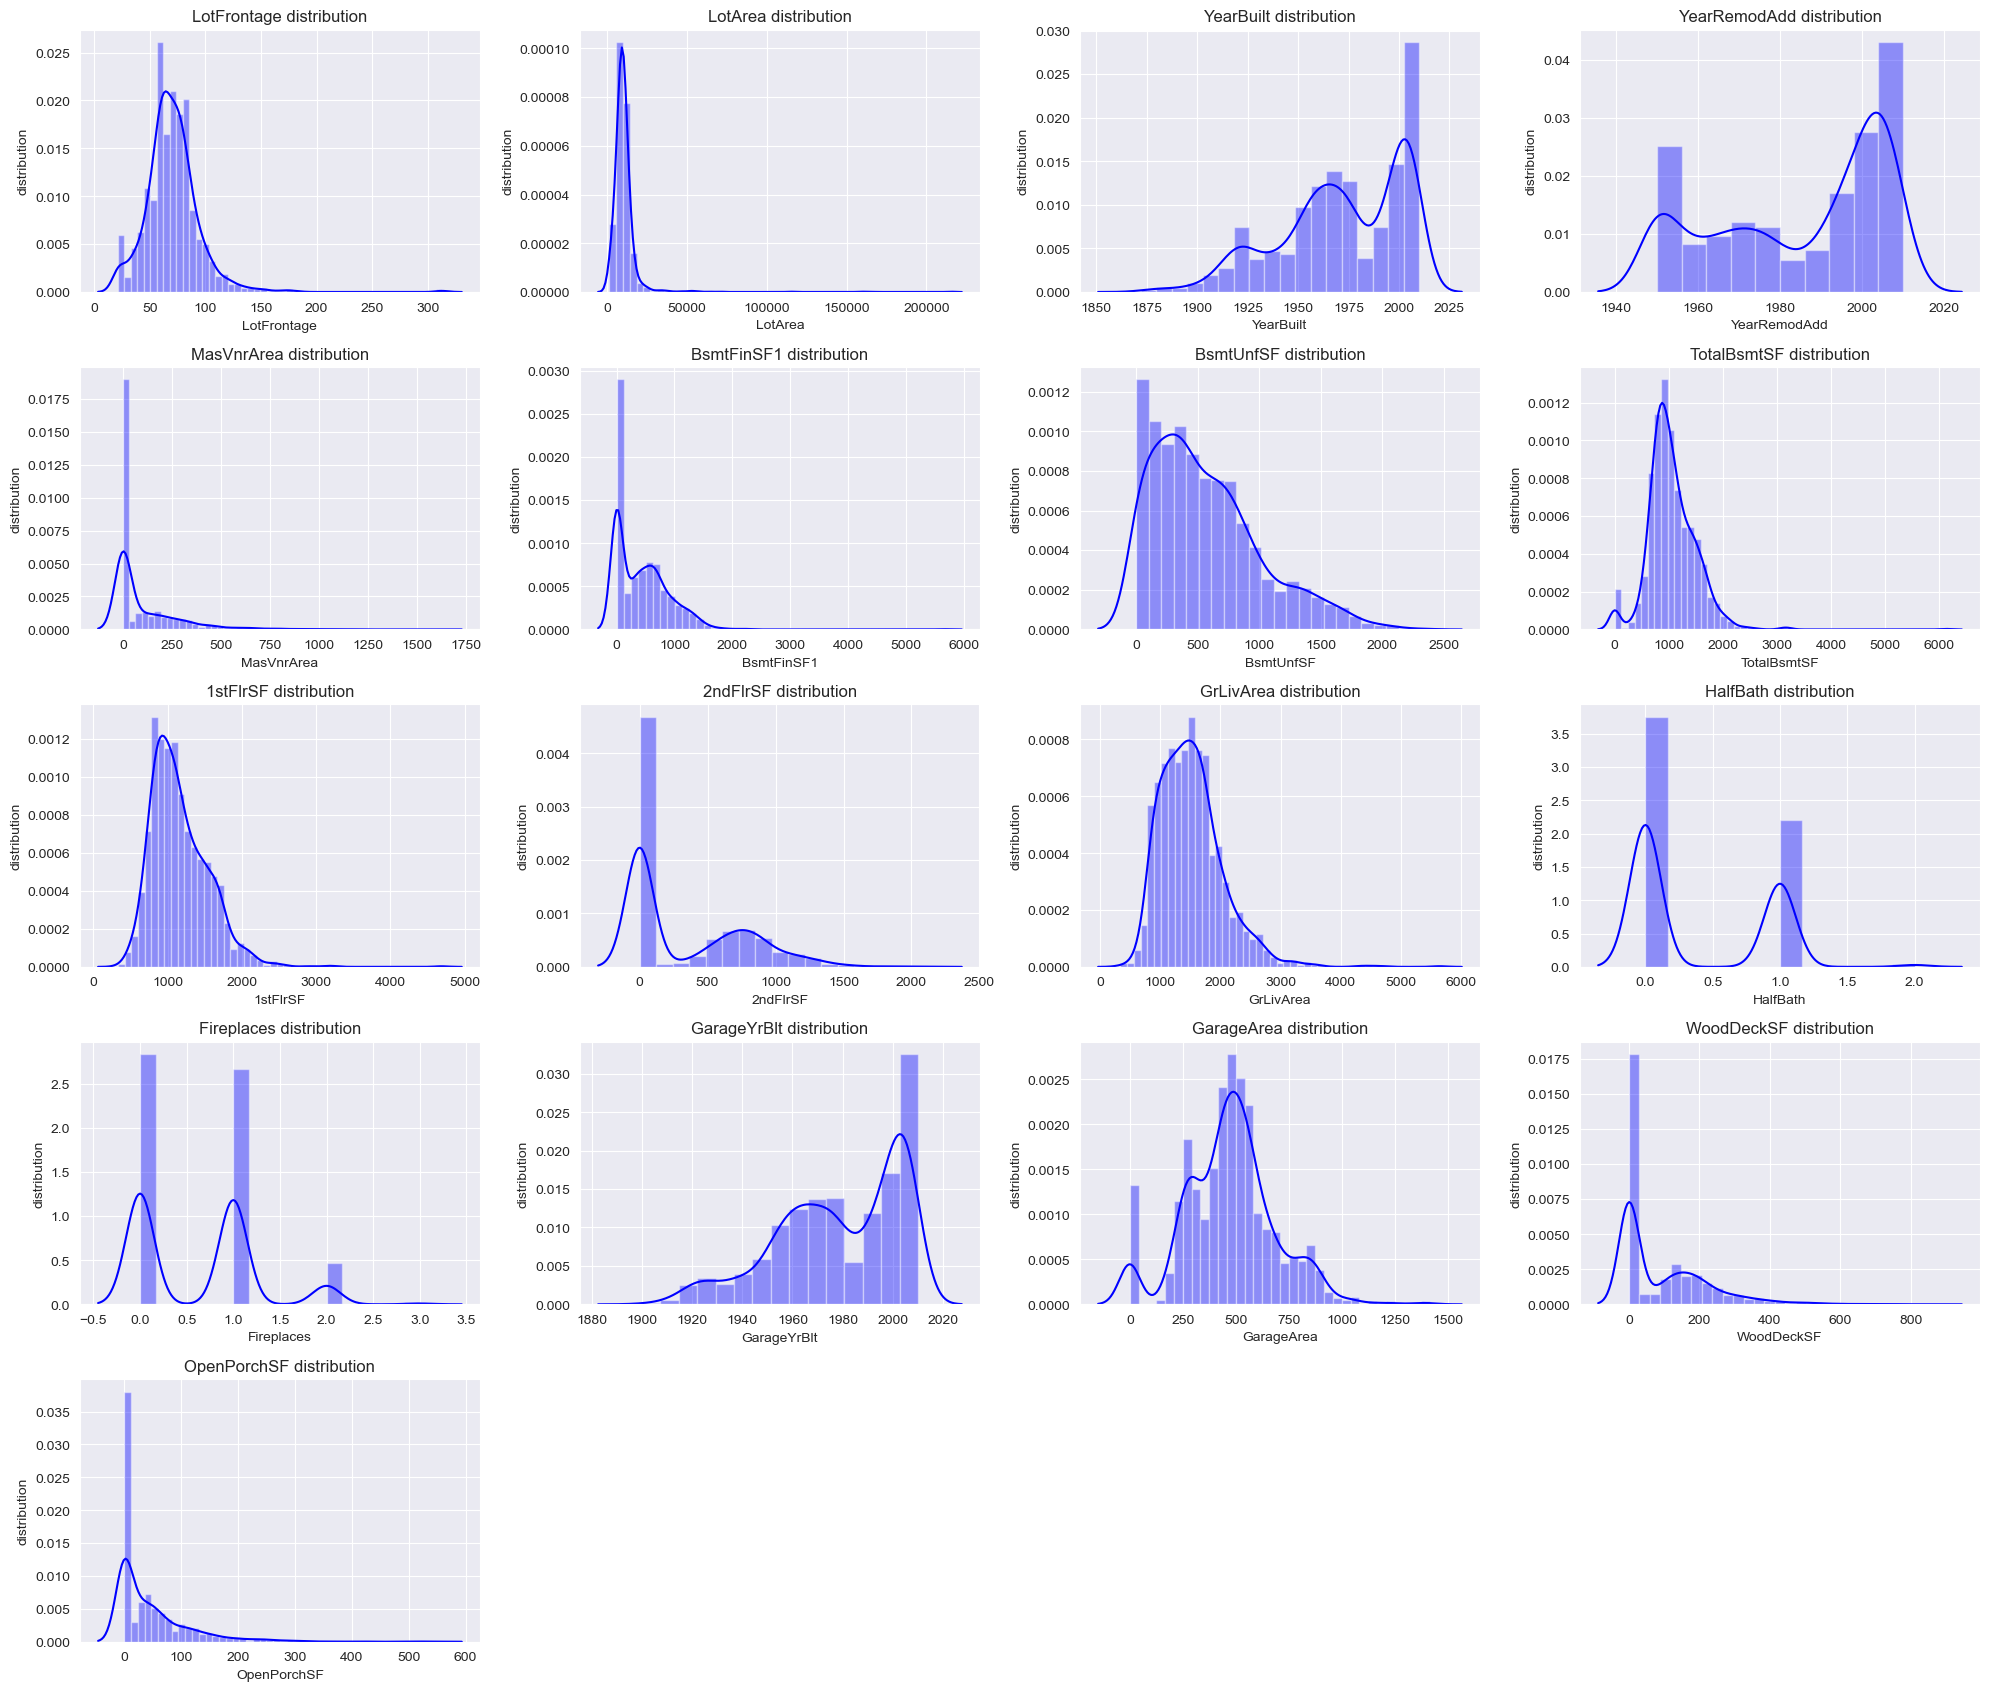

In [96]:
# checking the distribution of notable numerical features
sns.set_style('darkgrid')
plt.figure(figsize=(20,20))
for index, feature in enumerate(notable_num_feat):
    plt.subplot(6,4,index+1)
    sns.distplot(train[feature],kde=True, color='b')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")
plt.tight_layout()

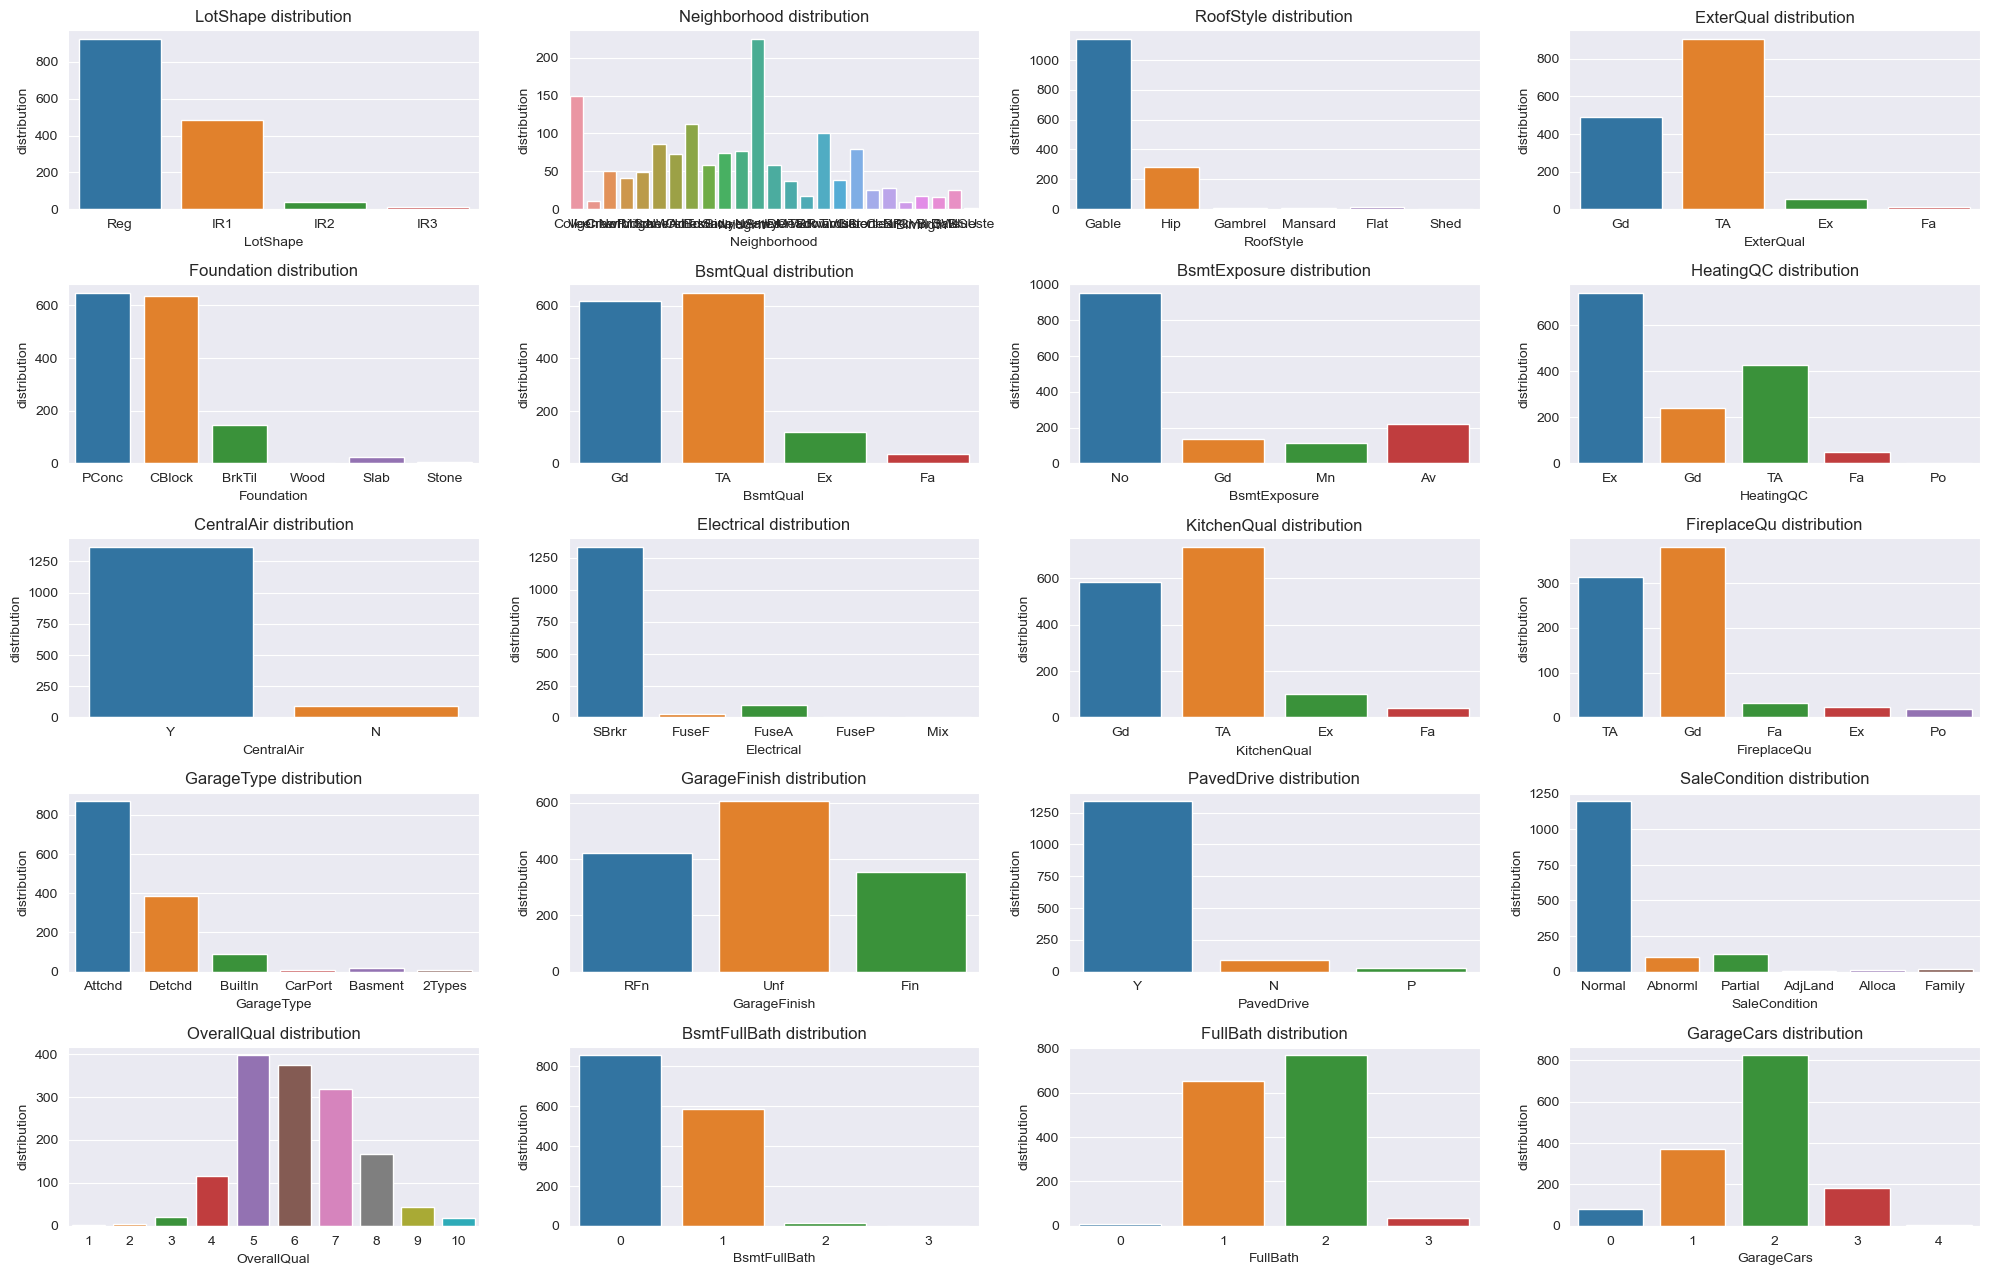

In [62]:
# checking the distribution of notable categorical features
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
for index, feature in enumerate(notable_cat_feat):
    plt.subplot(6,4,index+1)
    sns.countplot(x=feature,data=train)
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")
plt.tight_layout()

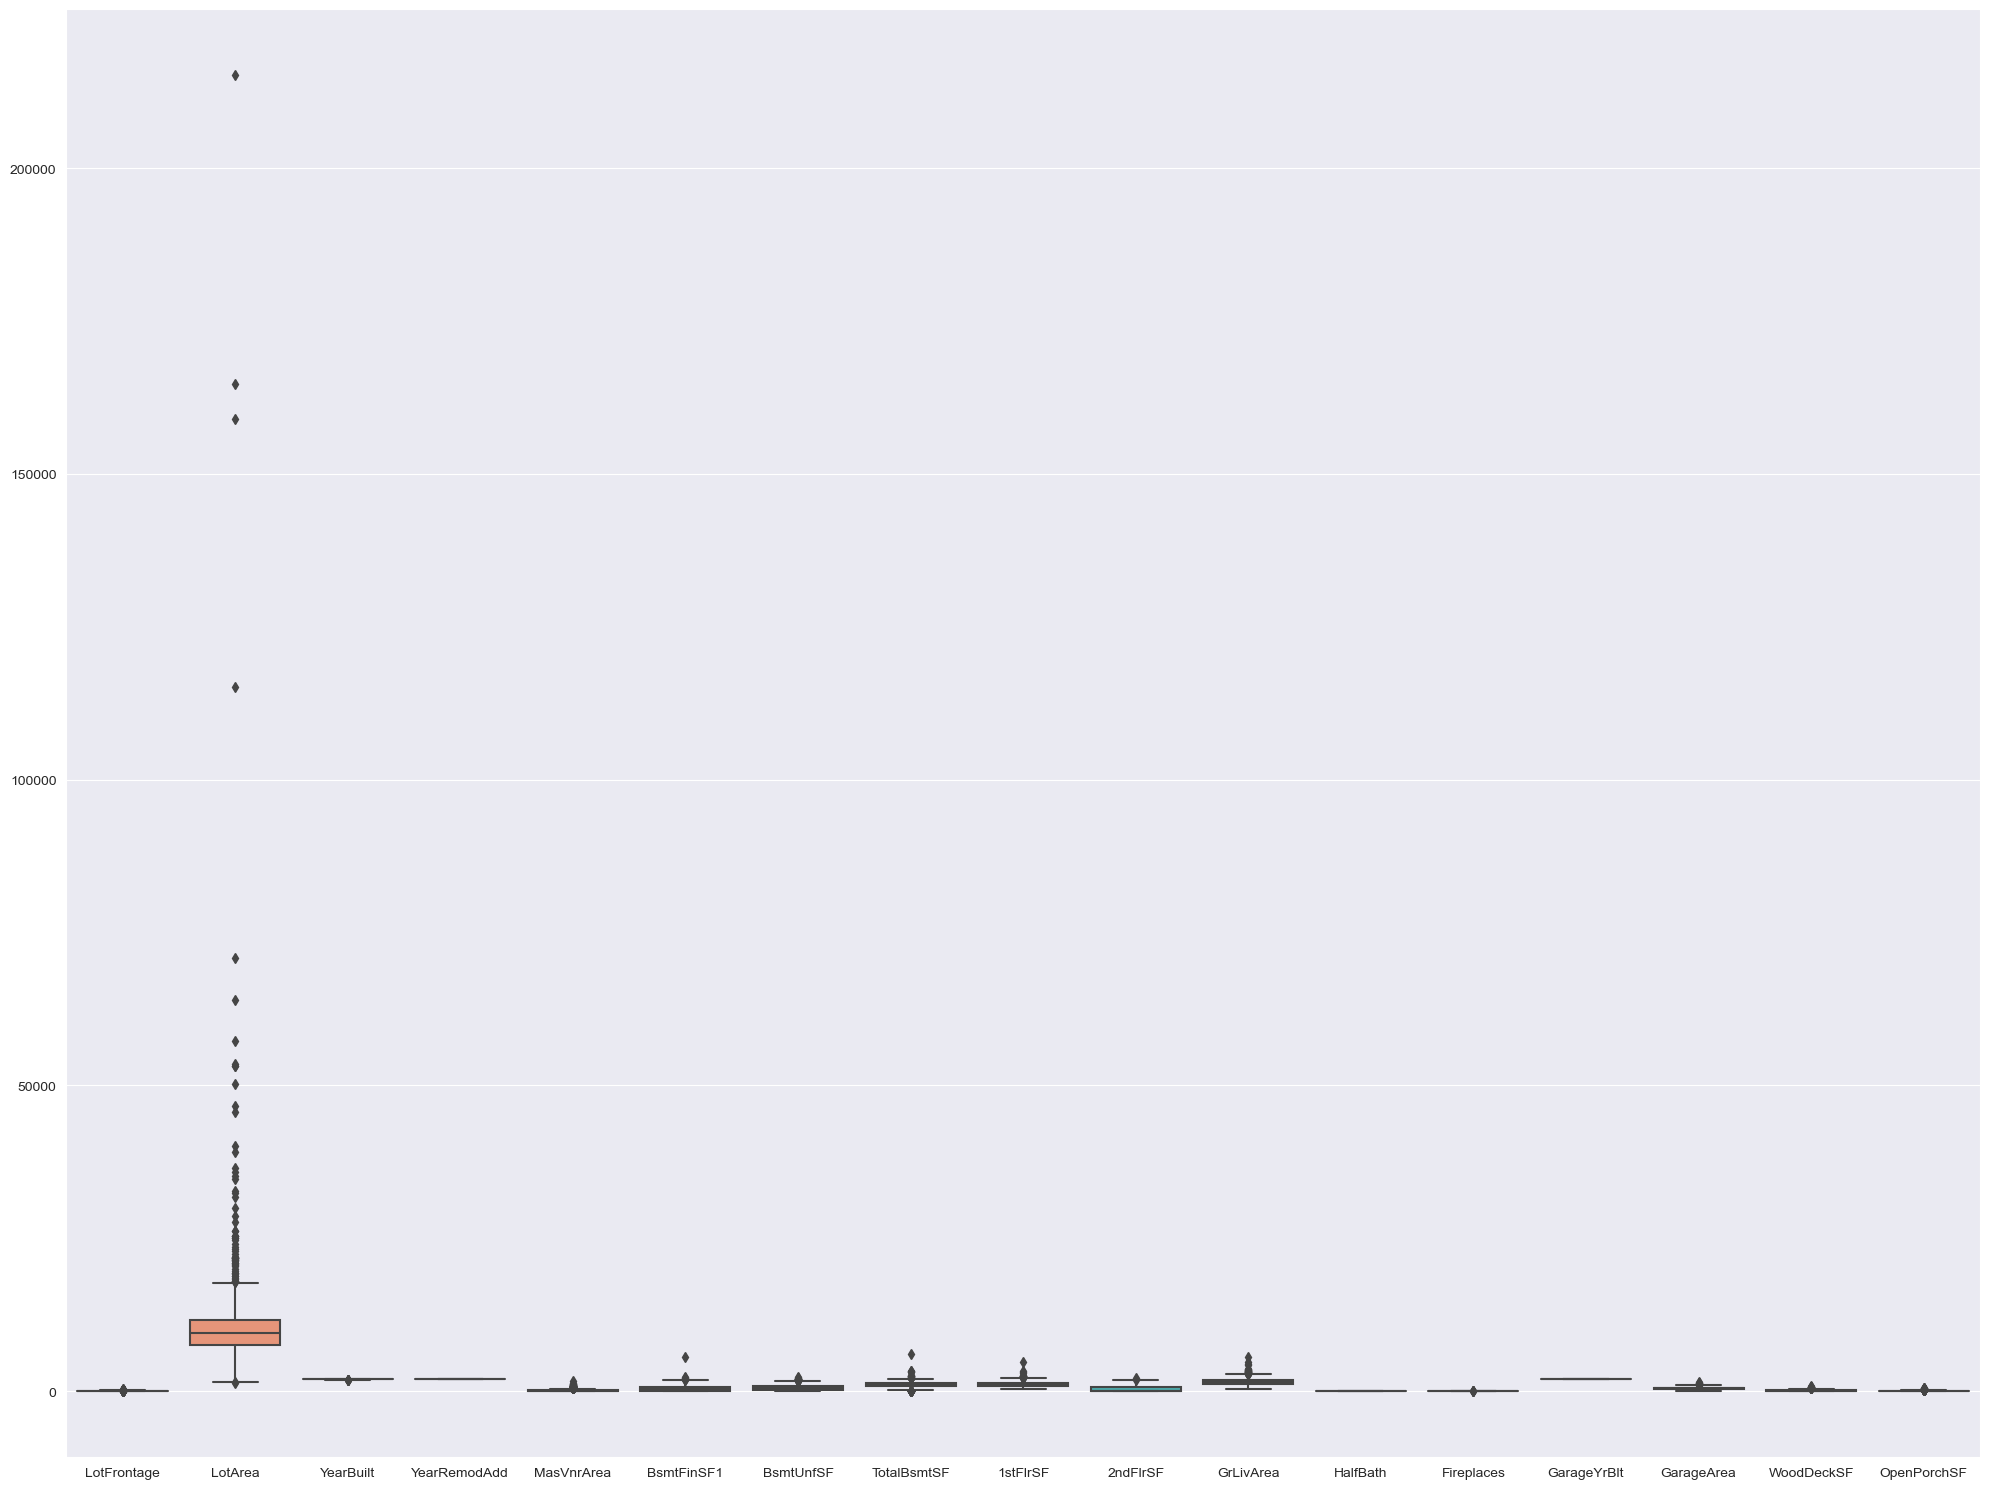

In [63]:
## finding out the outliers in the notable numerical features using box plot
plt.figure(figsize=(20,15))
sns.boxplot(data=train[notable_num_feat], orient='v')
plt.tight_layout()

In [64]:
## checking if the notable features have any missing values
# train[notable_num_feat + notable_cat_feat].isnull().sum()
miss_Val = pd.DataFrame()
miss_Val['Feature'] = notable_num_feat + notable_cat_feat
miss_Val['Feature_Type'] = miss_Val['Feature'].apply(lambda x: 'cat' if x in notable_cat_feat else 'num')
miss_Val['Missing_Value_Count'] = train[notable_num_feat + notable_cat_feat].isnull().sum().to_numpy()
miss_Val['Missing_Value_Percentage'] = miss_Val['Missing_Value_Count'].apply(lambda x: np.round(x/train.shape[0],2)*100)
miss_Val.loc[miss_Val['Missing_Value_Percentage'] > 0, :]

,Feature,Feature_Type,Missing_Value_Count,Missing_Value_Percentage
0,LotFrontage,num,259,18.0
4,MasVnrArea,num,8,1.0
13,GarageYrBlt,num,81,6.0
22,BsmtQual,cat,37,3.0
23,BsmtExposure,cat,38,3.0
28,FireplaceQu,cat,690,47.0
29,GarageType,cat,81,6.0
30,GarageFinish,cat,81,6.0


<AxesSubplot:>

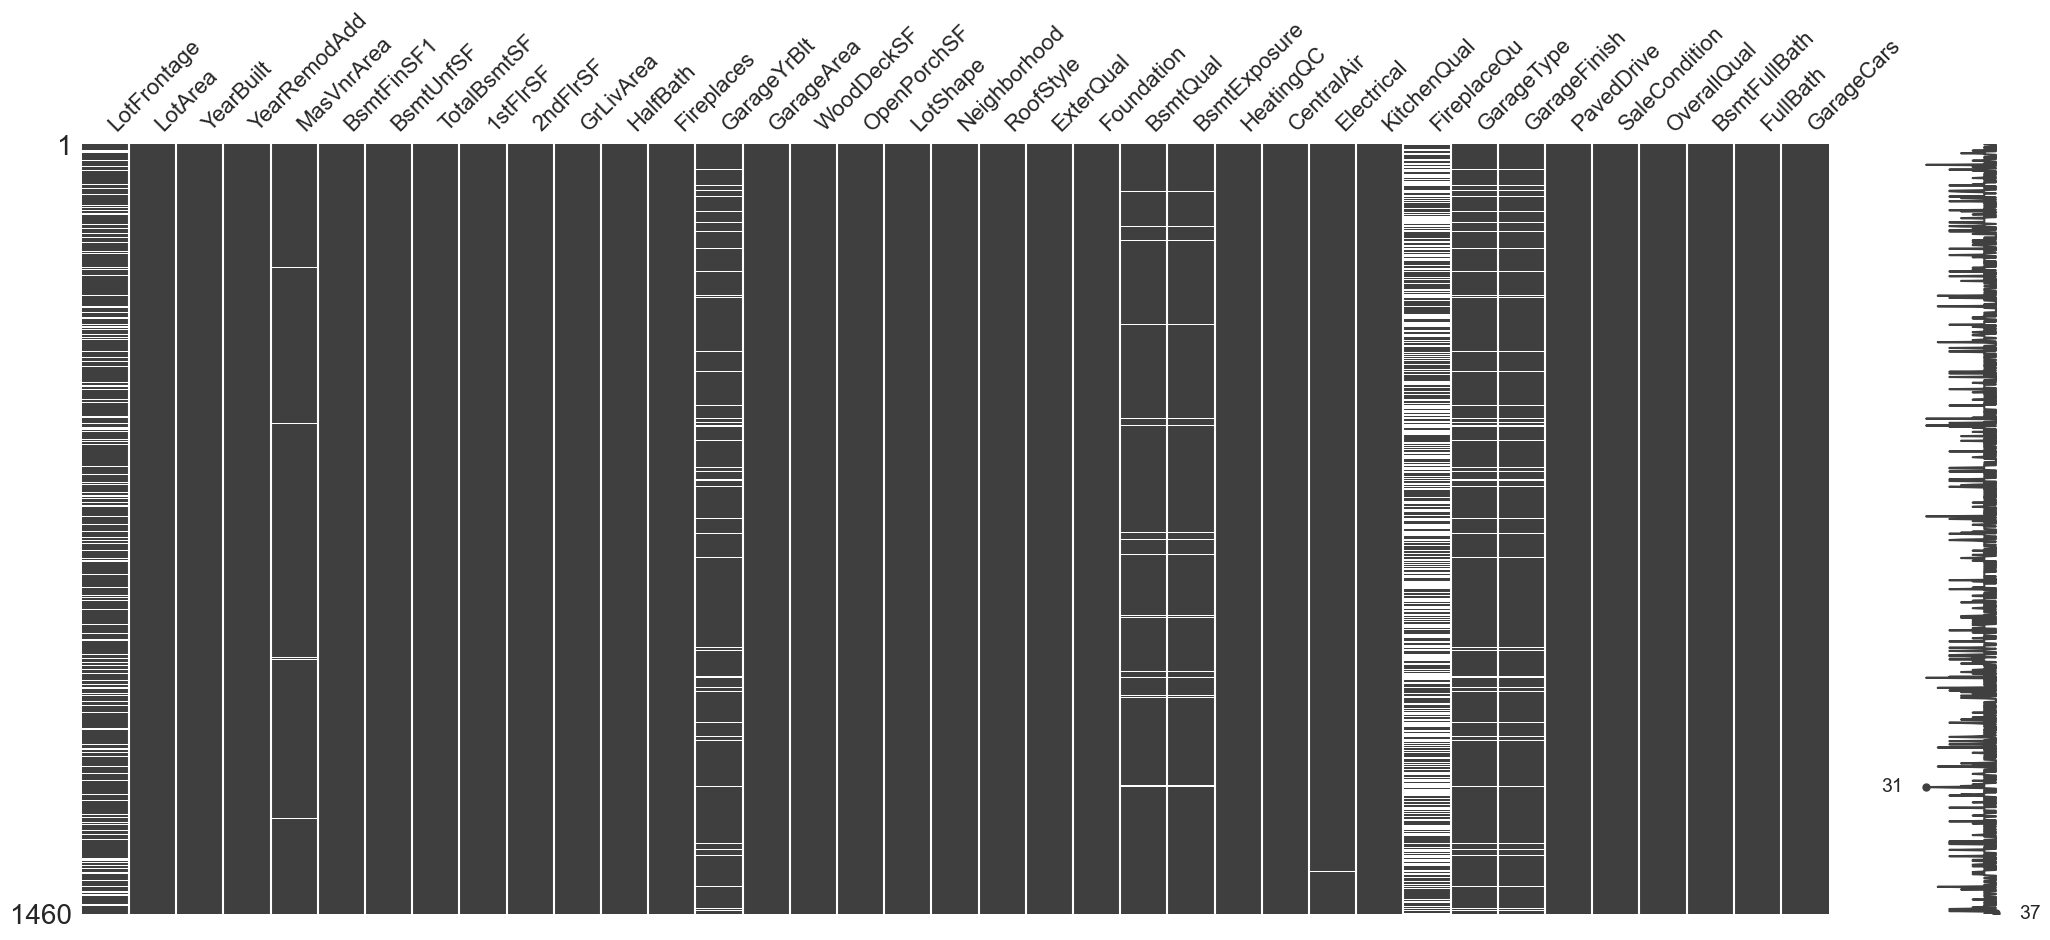

In [65]:
# visualizing the missing values
msgn.matrix(train[notable_num_feat + notable_cat_feat])

<a name="4"></a>
## 4 - Creating SKLearn Pipeline

<a name="4.1"></a>
#### 4.1 Handling Outliers

In [66]:
# creating a custom transformer to deal with the outliers from the data
class Outlier_Remover(BaseEstimator, TransformerMixin):
    
    def __init__(self,list_of_feature_names = notable_num_feat): 
        self.list_of_feature_names = list_of_feature_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        quantiles = X[notable_num_feat].quantile(np.arange(0,1,0.25)).T
        quantiles = quantiles.rename(columns={0.25:'Q1', 0.50: 'Q2', 0.75:'Q3'})
        
        quantiles['IQR'] = quantiles['Q3'] - quantiles['Q1']
        quantiles['Lower_Limit'] = quantiles['Q1'] - 1.5*quantiles['IQR']
        quantiles['Upper_Limit'] = quantiles['Q3'] + 1.5*quantiles['IQR']
        
        for feature in notable_num_feat:
            X[feature] = np.where((X[feature] < quantiles.loc[feature,'Lower_Limit']) | (X[feature] > quantiles.loc[feature,'Upper_Limit']) & (X[feature] is not np.nan), X[feature].median(), X[feature])
        
        return X


<a name="4.2"></a>
#### 4.2 - Fixing Skew

In [67]:
# creating a custom transformer which will be used to perform log transformation on the feature values
class Log_Transformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for feature in notable_num_feat:
                X[feature] = np.where(X[feature]==0,np.log(X[feature]+0.0002),np.log(X[feature]))
        return X

<a name="4.3"></a>
#### 4.3 - Handling Missing Values

In [68]:
# Creating a custom transformer to remove FireplaceQu
class Remove_Useless_Features(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X.drop(columns=['FireplaceQu'], axis=1, inplace=True)
        return X

<a name="4.4"></a>
#### 4.4 - Numerical Data Pipeline

In [69]:
# creating a numerical feature preprocessing pipeline using sklearn Pipeline class
num_pipe = Pipeline(steps=[
    ('outlier_removal',Outlier_Remover()),
    ('log_transformation',Log_Transformer()),
    ('replacing_num_missing_values',SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaling',MinMaxScaler())
])

In [70]:
# visualizing numerical preprocessing pipeline
from sklearn import set_config
set_config(display='diagram')  
num_pipe 

Pipeline(steps=[('outlier_removal', Outlier_Remover()),
                ('log_transformation', Log_Transformer()),
                ('replacing_num_missing_values',
                 SimpleImputer(strategy='median')),
                ('scaling', MinMaxScaler())])

<a name="4.5"></a>
#### 4.5 - Categorical Data Pipeline

In [71]:
# creating a categorical feature preprocessing pipeline using sklearn Pipeline class
cat_pipe = Pipeline(steps=[
    ('remove_useless_features',Remove_Useless_Features()),
    ('replacing_cat_missing_values', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('replacing_cat_missing_values2', SimpleImputer(strategy='most_frequent', missing_values=np.nan)) # this step is to make sure to fill the missing values created in encoding step
])

In [72]:
# visualizing categorical preprocessing pipeline
set_config(display='diagram')  
cat_pipe 

Pipeline(steps=[('remove_useless_features', Remove_Useless_Features()),
                ('replacing_cat_missing_values',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('replacing_cat_missing_values2',
                 SimpleImputer(strategy='most_frequent'))])

<a name="4.6"></a>
#### 4.6 - Combining Data Pipelines

In [73]:
# combining both (numerical and categorical) the pipelines using sklearn ColumnTransformer class
preprocess_pipe = ColumnTransformer([
    ('num_preprocessing',num_pipe, notable_num_feat),
    ('cat_preprocessing', cat_pipe, notable_cat_feat)
], remainder='drop')

In [74]:
# visualizing a whole preprocessing pipeline
set_config(display='diagram')  
preprocess_pipe 

ColumnTransformer(transformers=[('num_preprocessing',
                                 Pipeline(steps=[('outlier_removal',
                                                  Outlier_Remover()),
                                                 ('log_transformation',
                                                  Log_Transformer()),
                                                 ('replacing_num_missing_values',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling', MinMaxScaler())]),
                                 ['LotFrontage', 'LotArea', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtUnfSF', 'TotalBsmtSF', '1s...
                                                                 unknown_value=nan)),
                                                 ('replacing_cat_missing_values2',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['LotShape', 'Neighborhood', 'RoofStyle',
                                  'ExterQual', 'Foundation', 'BsmtQual',
                                  'BsmtExposure', 'HeatingQC', 'CentralAir',
                                  'Electrical', 'KitchenQual', 'FireplaceQu',
                                  'GarageType', 'GarageFinish', 'PavedDrive',
                                  'SaleCondition', 'OverallQual',
                                  'BsmtFullBath', 'FullBath', 'GarageCars'])])

<a name="4.7"></a>
#### 4.7 - Machine Learning Models

In [75]:
## model 1: Support Vector Regression
from sklearn.svm import SVR
svr = SVR()

## model 2: Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

## model 3: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4,random_state=123)

## model 4: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

## model 5: Xgboost Regressor
from xgboost import XGBRegressor
xgbr = XGBRegressor(seed=24324)

## model 6: AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=123)

## model 7: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

## model 8: voting regressor of model 1, model 2 and model 4
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators = [('svr', svr), ('knr', knr), ('rfr', rfr)])

## model 9: light gbm regressor
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor()

## model 10: catboost regressor
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=False)

<a name="4.8"></a>
#### 4.8 - Adding ML Models to the Pipeline

In [76]:
## svr pipeline
svr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('svr_model',svr)
])

## knr pipeline
knr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('knr_model',knr)
])

## dtr pipeline
dtr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('dtr_model',dtr)
])

## rfr pipeline
rfr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('rfr_model',rfr)
])

## xgbr pipeline
xgbr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('xgbr_model',xgbr)
])

## abr pipeline
abr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('abr_model', abr)
])

## gbr pipeline
gbr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('gbr_model', gbr)
])

## vr pipeline
vr_pipe = Pipeline(steps=[
    ('preprocess_pipe', preprocess_pipe),
    ('vr_model', vr)
])

## lgbmr pipeline
lgbmr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('lgbmr_model',lgbmr)
])

## cbr pipeline
cbr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('cbr_model',cbr)
])

In [77]:
## Visualizing the whole pipelines (preprocess pipelines + model training pipeline)
set_config(display='diagram')  
rfr_pipe

Pipeline(steps=[('preprocess_pipe',
                 ColumnTransformer(transformers=[('num_preprocessing',
                                                  Pipeline(steps=[('outlier_removal',
                                                                   Outlier_Remover()),
                                                                  ('log_transformation',
                                                                   Log_Transformer()),
                                                                  ('replacing_num_missing_values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFi...
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['LotShape', 'Neighborhood',
                                                   'RoofStyle', 'ExterQual',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtExposure', 'HeatingQC',
                                                   'CentralAir', 'Electrical',
                                                   'KitchenQual', 'FireplaceQu',
                                                   'GarageType', 'GarageFinish',
                                                   'PavedDrive',
                                                   'SaleCondition',
                                                   'OverallQual',
                                                   'BsmtFullBath', 'FullBath',
                                                   'GarageCars'])])),
                ('rfr_model', RandomForestRegressor())])

<a name="5"></a>
## 5 - Models Cross Validation

In [78]:
## splitting the data into independent and dependent features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [79]:
## Finding out the best model using the cross validation 
pipelines = [svr_pipe, knr_pipe, dtr_pipe, rfr_pipe, xgbr_pipe, abr_pipe, gbr_pipe, vr_pipe, lgbmr_pipe, cbr_pipe]
models = ['SupportVectorRegressor', 'KneighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XgboostRegressor', 'AdaboostRegressor', 'GradientBoostRegressor', 'VotingRegressor', 'LGBMRegressor', 'CatBoostRegressor']
cv_mean = []
cv = KFold(n_splits=10)
for index, pipeline in enumerate(pipelines):
    mean = np.round(cross_val_score(estimator=pipeline, X=X, y=y,cv=cv,scoring='r2').mean(),3)
    cv_mean.append(mean)
    std = np.round(cross_val_score(estimator=pipeline, X=X, y=y,cv=cv,scoring='r2').std(),3)
    print(f"The cross validation score for the model {models[index]} is {mean} +/- {std}.")
    

The cross validation score for the model SupportVectorRegressor is -0.053 +/- 0.031.
The cross validation score for the model KneighborsRegressor is 0.741 +/- 0.026.
The cross validation score for the model DecisionTreeRegressor is 0.672 +/- 0.091.
The cross validation score for the model RandomForestRegressor is 0.845 +/- 0.041.
The cross validation score for the model XgboostRegressor is 0.822 +/- 0.064.
The cross validation score for the model AdaboostRegressor is 0.767 +/- 0.047.
The cross validation score for the model GradientBoostRegressor is 0.844 +/- 0.04.
The cross validation score for the model VotingRegressor is 0.703 +/- 0.038.
The cross validation score for the model LGBMRegressor is 0.846 +/- 0.044.
The cross validation score for the model CatBoostRegressor is 0.881 +/- 0.025.


[Text(0, 0, '-0.053'),
 Text(0, 0, '0.741'),
 Text(0, 0, '0.672'),
 Text(0, 0, '0.845'),
 Text(0, 0, '0.822'),
 Text(0, 0, '0.767'),
 Text(0, 0, '0.844'),
 Text(0, 0, '0.703'),
 Text(0, 0, '0.846'),
 Text(0, 0, '0.881')]

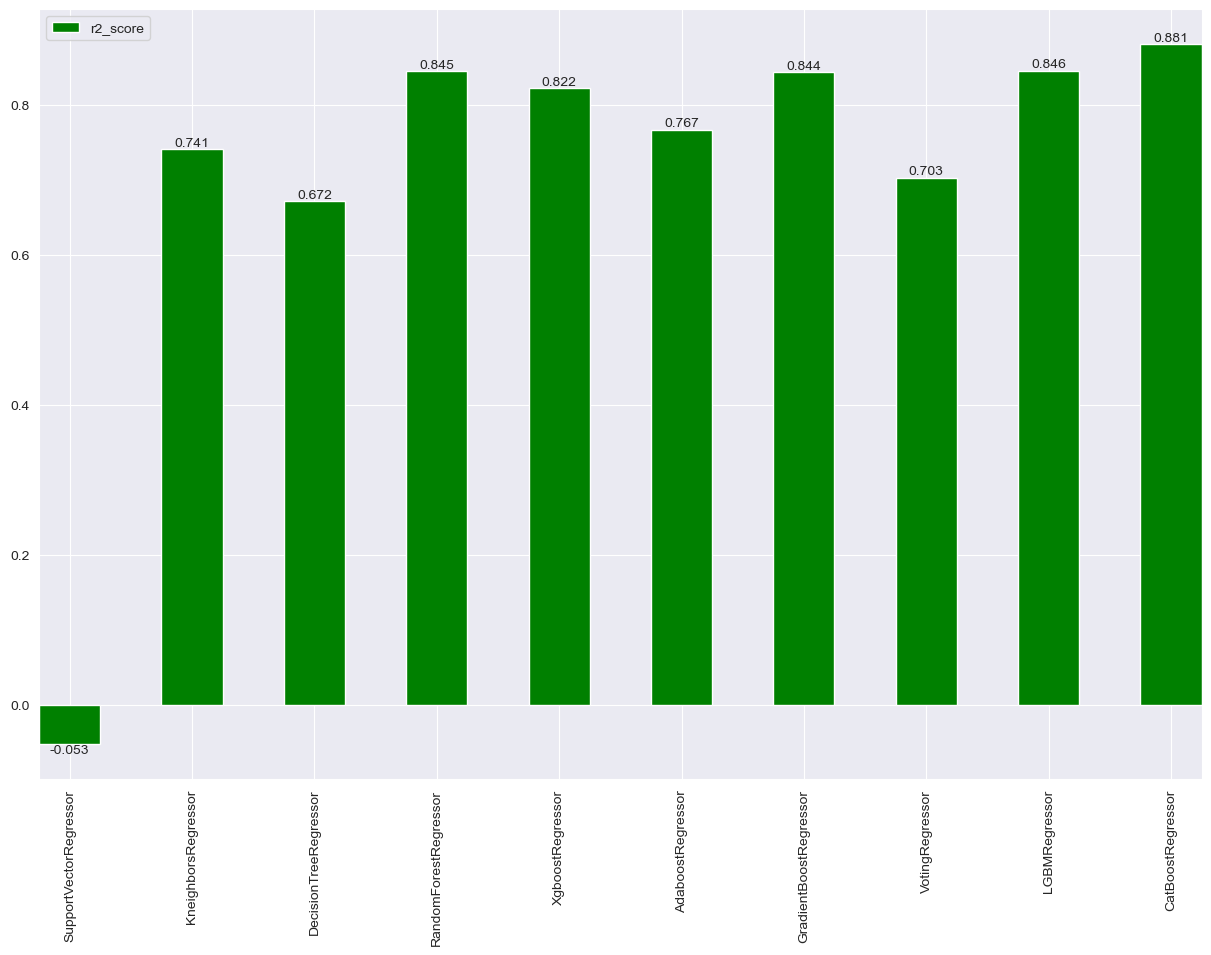

In [80]:
ax = pd.DataFrame(cv_mean, columns=['r2_score'], index=models).plot(kind='bar', color='g', figsize=(15,10), grid=True)
ax.autoscale(axis='x', tight=True)
ax.legend(loc=2)
ax.bar_label(ax.containers[0])

<a name="6"></a>
## 6 - Hyperparameter Tuning

<a name="6.1"></a>
#### 6.1 - Coarse Hyperparameter Tuning Using RandomizedSearchCV

In [81]:
# hyperparameters to be tested for random forest regressor
rfr_params = {
    'n_estimators': np.arange(100,600,100),
    'max_depth': np.arange(3,10,1),
    'max_features': np.arange(9,28,3),
    'bootstrap': [True, False]
}

# hyperparameters to be tested for xgboost regressor
xgbr_params = {
    'n_estimators': np.arange(100,600,100),
    'max_depth': np.arange(2,10,1),
    'learning_rate': np.arange(0.1,1.1,0.1)
}

# hyperparameters to be tested for gradient boost regressor
gbr_params = {
    'learning_rate': np.arange(0.1,1.1,0.1),
    'n_estimators': np.arange(100,600,100),
    'max_depth': np.arange(3,10,1),
    'max_features': np.arange(9,28,3)
}

# hyperparameters to be tested for LGBMRegressor
lgbmr_params = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [2,3,4],
    'max_depth': np.arange(3,10,1),
    'learning_rate': np.arange(0.1,1.1,0.1),
    'n_estimators': np.arange(100,600,100)
}

# hyperparameters to be tested for catboost regressor
cbr_params = {
    'learning_rate': np.arange(0.1,1.1,0.1),
    'max_depth': np.arange(3,10,1),
    'n_estimators': np.arange(100,600,100)
}

In [82]:
tune_models = [rfr, xgbr, gbr, lgbmr, cbr]
tune_model_names = ['Random Forest Regressor', 'XGBoost Regressor', 'Gradient Boost Regressor', 'LGBM Regressor', 'Catboost Regressor']
tuning_params = [rfr_params, xgbr_params, gbr_params, lgbmr_params, cbr_params]
best_score = []

for index, model in enumerate(tune_models):
    grid = RandomizedSearchCV(model, tuning_params[index], cv=5, scoring='r2',random_state=2434)
    grid.fit(preprocess_pipe.fit_transform(X),y)
    best_score.append(grid.best_score_)
    print(f"Best score for the model {tune_model_names[index]} after hyperparameter tuning is {grid.best_score_}.")
    print(f"The parameters that give this best score are {grid.best_params_}.\n")

Best score for the model Random Forest Regressor after hyperparameter tuning is 0.85490394574141.
The parameters that give this best score are {'n_estimators': 300, 'max_features': 21, 'max_depth': 8, 'bootstrap': False}.

Best score for the model XGBoost Regressor after hyperparameter tuning is 0.8634566184602569.
The parameters that give this best score are {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2}.

Best score for the model Gradient Boost Regressor after hyperparameter tuning is 0.8604621360778548.
The parameters that give this best score are {'n_estimators': 100, 'max_features': 12, 'max_depth': 5, 'learning_rate': 0.1}.

Best score for the model LGBM Regressor after hyperparameter tuning is 0.853541600421239.
The parameters that give this best score are {'num_leaves': 3, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.6, 'boosting_type': 'dart'}.

Best score for the model Catboost Regressor after hyperparameter tuning is 0.8755168117709445.
The parameters

[Text(0, 0, '0.838009'),
 Text(0, 0, '0.855571'),
 Text(0, 0, '0.868224'),
 Text(0, 0, '0.851747'),
 Text(0, 0, '0.874033')]

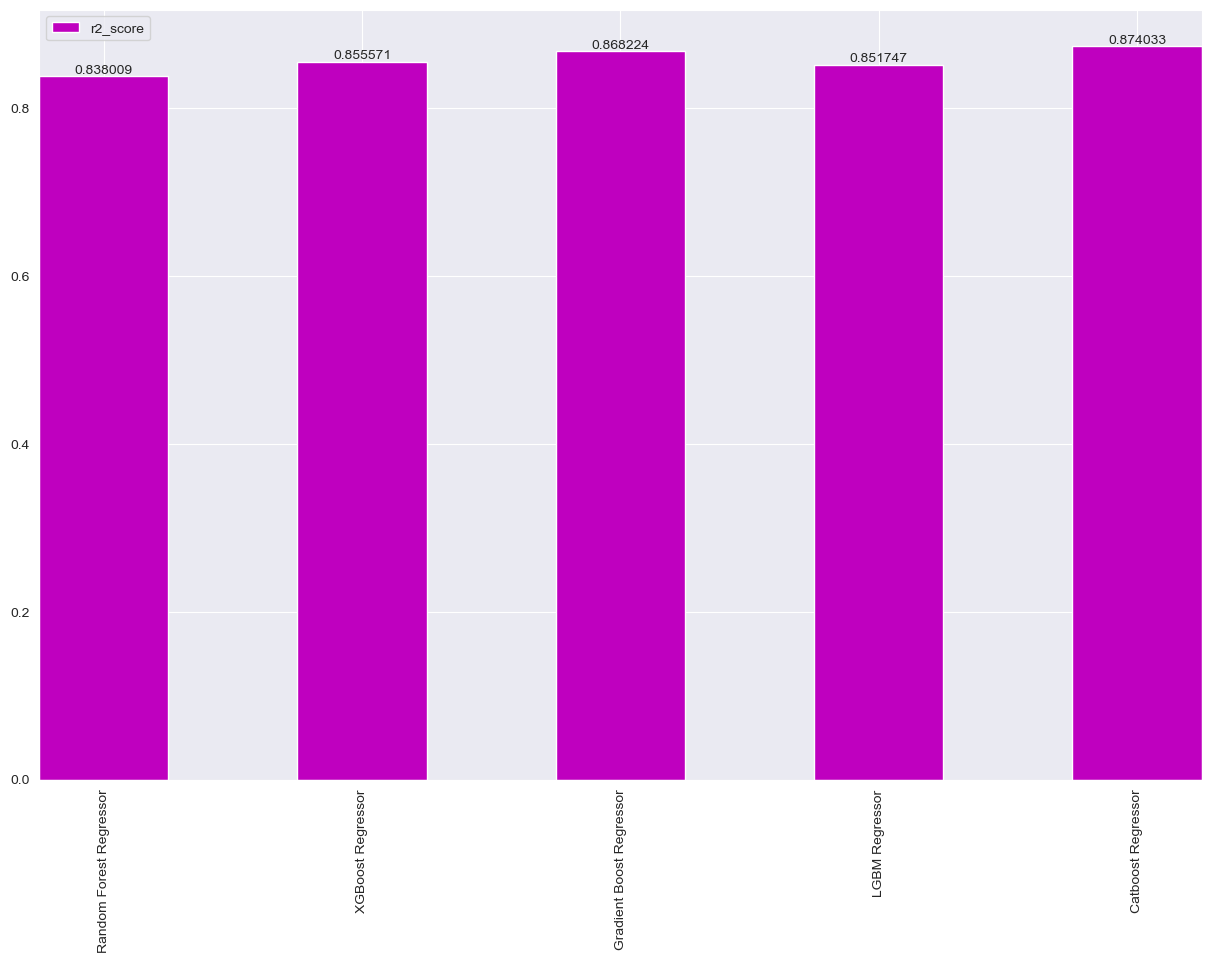

In [40]:
ax = pd.DataFrame(best_score, columns=['r2_score'], index=tune_model_names).plot(kind='bar', color='m', figsize=(15,10), grid=True)
ax.autoscale(axis='x', tight=True)
ax.legend(loc=2)
ax.bar_label(ax.containers[0])

<a name="6.2"></a>
#### 6.2 - Finer Hyperparameter Tuning Using GridSearchCV

In [97]:
# hyperparameters to be tested for random forest regressor
rfr_params = {
    'n_estimators':[150,200,250],
    'max_depth':[8,9,10],
    'max_features':[19,20,21],
    'bootstrap':[False]
}

# hyperparameters to be tested for xgboost regressor
xgbr_params = {
    'n_estimators':[350,400,450],
    'max_depth':[3,4,5],
    'learning_rate': [0.05,0.1,0.15]
}

# hyperparameters to be tested for gradient boost regressor
gbr_params = {
    'n_estimators':[100,150,200],
    'max_features':[12,13,14],
    'max_depth':[4,5,6],
    'learning_rate':[0.05, 0.1, 0.15]
}

# hyperparameters to be tested for LGBM regressor
lgbmr_params = {
    'num_leaves': [3,4,5],
    'n_estimators': [200,250,300],
    'max_depth': [5,6,7],
    'learning_rate':[0.6,0.7,0.8],
    'boosting_type':['dart']
}

# hyperparameters to be tested for catboost regressor
cbr_params = {
    'n_estimators':[300,400,500],
    'max_depth':[3,4,5],
    'learning_rate': [0.1, 0.2, 0.3]
}

In [98]:
tune_models = [rfr, xgbr, gbr, lgbmr, cbr]
tune_model_names = ['Random Forest Regressor', 'XGBoost Regressor', 'Gradient Boost Regressor', 'LGBM Regressor', 'Catboost Regressor']
tuning_params = [rfr_params, xgbr_params, gbr_params, lgbmr_params, cbr_params]
best_score = []

for index, model in enumerate(tune_models):
    grid = GridSearchCV(model, tuning_params[index], cv=5, scoring='r2')
    grid.fit(preprocess_pipe.fit_transform(X),y)
    best_score.append(grid.best_score_)
    print(f"Best score for the model {tune_model_names[index]} after hyperparameter tuning is {grid.best_score_}.")
    print(f"The parameters that give this best score are {grid.best_params_}.\n")

Best score for the model Random Forest Regressor after hyperparameter tuning is 0.863582943949034.
The parameters that give this best score are {'bootstrap': False, 'max_depth': 10, 'max_features': 20, 'n_estimators': 200}.

Best score for the model XGBoost Regressor after hyperparameter tuning is 0.8665348836336648.
The parameters that give this best score are {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 450}.

Best score for the model Gradient Boost Regressor after hyperparameter tuning is 0.8808602744789988.
The parameters that give this best score are {'learning_rate': 0.15, 'max_depth': 6, 'max_features': 13, 'n_estimators': 150}.

Best score for the model LGBM Regressor after hyperparameter tuning is 0.8657122249117195.
The parameters that give this best score are {'boosting_type': 'dart', 'learning_rate': 0.7, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 4}.

Best score for the model Catboost Regressor after hyperparameter tuning is 0.8764607756325071.
The param

[Text(0, 0, '0.863583'),
 Text(0, 0, '0.866535'),
 Text(0, 0, '0.88086'),
 Text(0, 0, '0.865712'),
 Text(0, 0, '0.876461')]

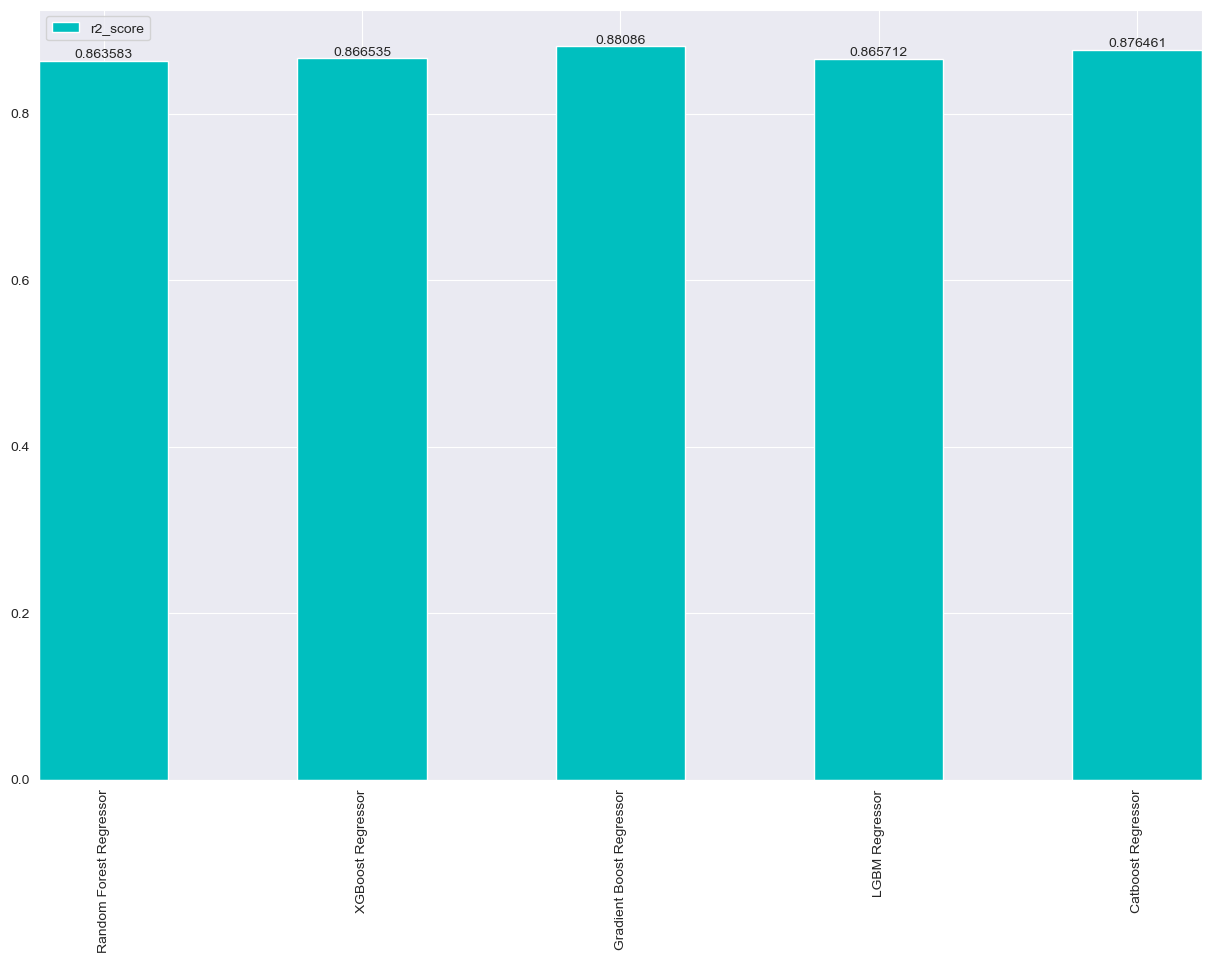

In [99]:
ax = pd.DataFrame(best_score, columns=['r2_score'], index=tune_model_names).plot(kind='bar', color='c', figsize=(15,10), grid=True)
ax.autoscale(axis='x', tight=True)
ax.legend(loc=2)
ax.bar_label(ax.containers[0])

In [100]:
# Setting the parameters with the highest r2 score
rfr.set_params(bootstrap=False,max_depth=10,max_features=20,n_estimators=200,random_state=234)
xgbr.set_params(learning_rate=0.05, max_depth=3, n_estimators=450)
gbr.set_params(n_estimators=150, max_features=13, max_depth=6, learning_rate=0.15, random_state=23432)
lgbmr.set_params(boosting_type='dart', learning_rate=0.7, max_depth=5, n_estimators=300, num_leaves=4, random_state=3423)
cbr.set_params(learning_rate=0.2, max_depth=5, n_estimators=300, random_seed=2344)

In [101]:
for index, pipeline in enumerate(pipelines):
    model = pipeline.fit(X,y)
    #model = pipeline.fit(X_train,y_train)
    #y_pred = model.predict(X_cv)
    #score = mean_squared_error(y_cv, y_pred, squared=False)
    #print(f"The cross validation score for the model {models[index]} is {score}.")
    with open(os.path.join('working/',str(models[index])+'.pkl'), 'wb') as f:
        pickle.dump(model,f)

<a name="7"></a>
## 7 - Making Predictions

In [102]:
with open('working/GradientBoostRegressor.pkl', 'rb') as file:
    gbr_model = pickle.load(file)
y_pred = gbr_model.predict(test)

In [103]:
predictions = pd.DataFrame()
predictions['Id'] = test['Id']
predictions['SalePrice'] = y_pred
predictions.head()

,Id,SalePrice
0,1461,125986.717540
1,1462,155356.252644
2,1463,177460.059547
3,1464,186429.850920
4,1465,187666.348490


In [104]:
predictions.to_csv('submission/submission.csv', index=False)